In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df_data = pd.read_csv("Country-data.csv")
df_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
#removing the column country
data = df_data.drop('country', axis = 1)
#exports, health and imports are given as % of GDP Percapita.
#Converting percentages to values
data.exports = (data.exports / 100 ) * (data.gdpp)
data.health = (data.health / 100 ) * (data.gdpp)
data.imports = (data.imports / 100 ) * (data.gdpp)
#Making sure the changes are done
data.head()

child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

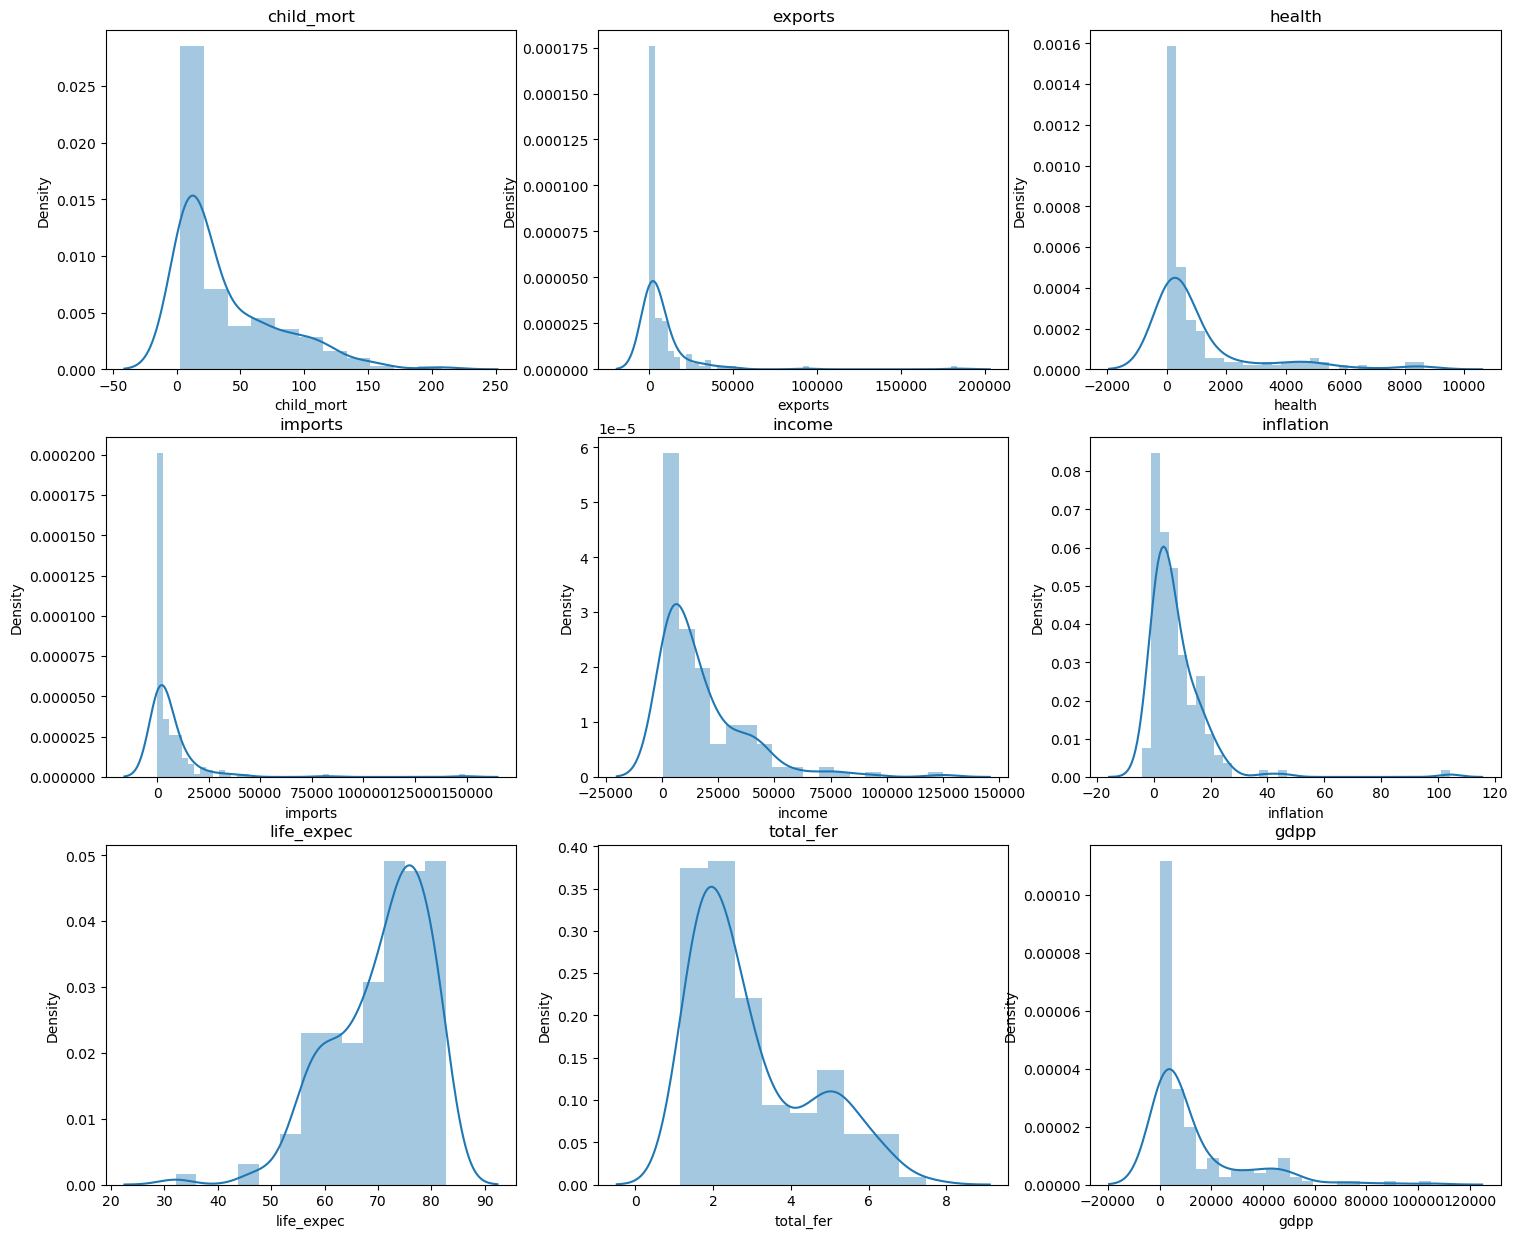

In [5]:
plt.figure(figsize=(18,15))
features = data.columns
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(data[i[1]])
    plt.title(str(i[1]))

In [8]:
#checking skewness of each feature before transforming the data
data.skew()

child_mort    1.450774
exports       6.720171
health        2.526029
imports       6.618500
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

In [9]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformed_data = pd.DataFrame(pt.fit_transform(data))
transformed_data.columns= data.columns
transformed_data.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   0.459416   -1.526455   
1   -0.220994 -0.238427 -0.042924 -0.055108  0.012538  -0.154659    0.621738   
2    0.217834 -0.030785 -0.270052 -0.266188  0.232275   1.059790    0.652698   
3    1.506186  0.100544 -0.661987 -0.219429 -0.408251   1.512843   -1.239045   
4   -0.637380  0.602677  0.563269  0.758134  0.572583  -0.723442    0.699553   

   total_fer      gdpp  
0   1.544053 -1.462273  
1  -0.992833 -0.121133  
2   0.313175 -0.063195  
3   1.623128 -0.219666  
4  -0.368063  0.609228

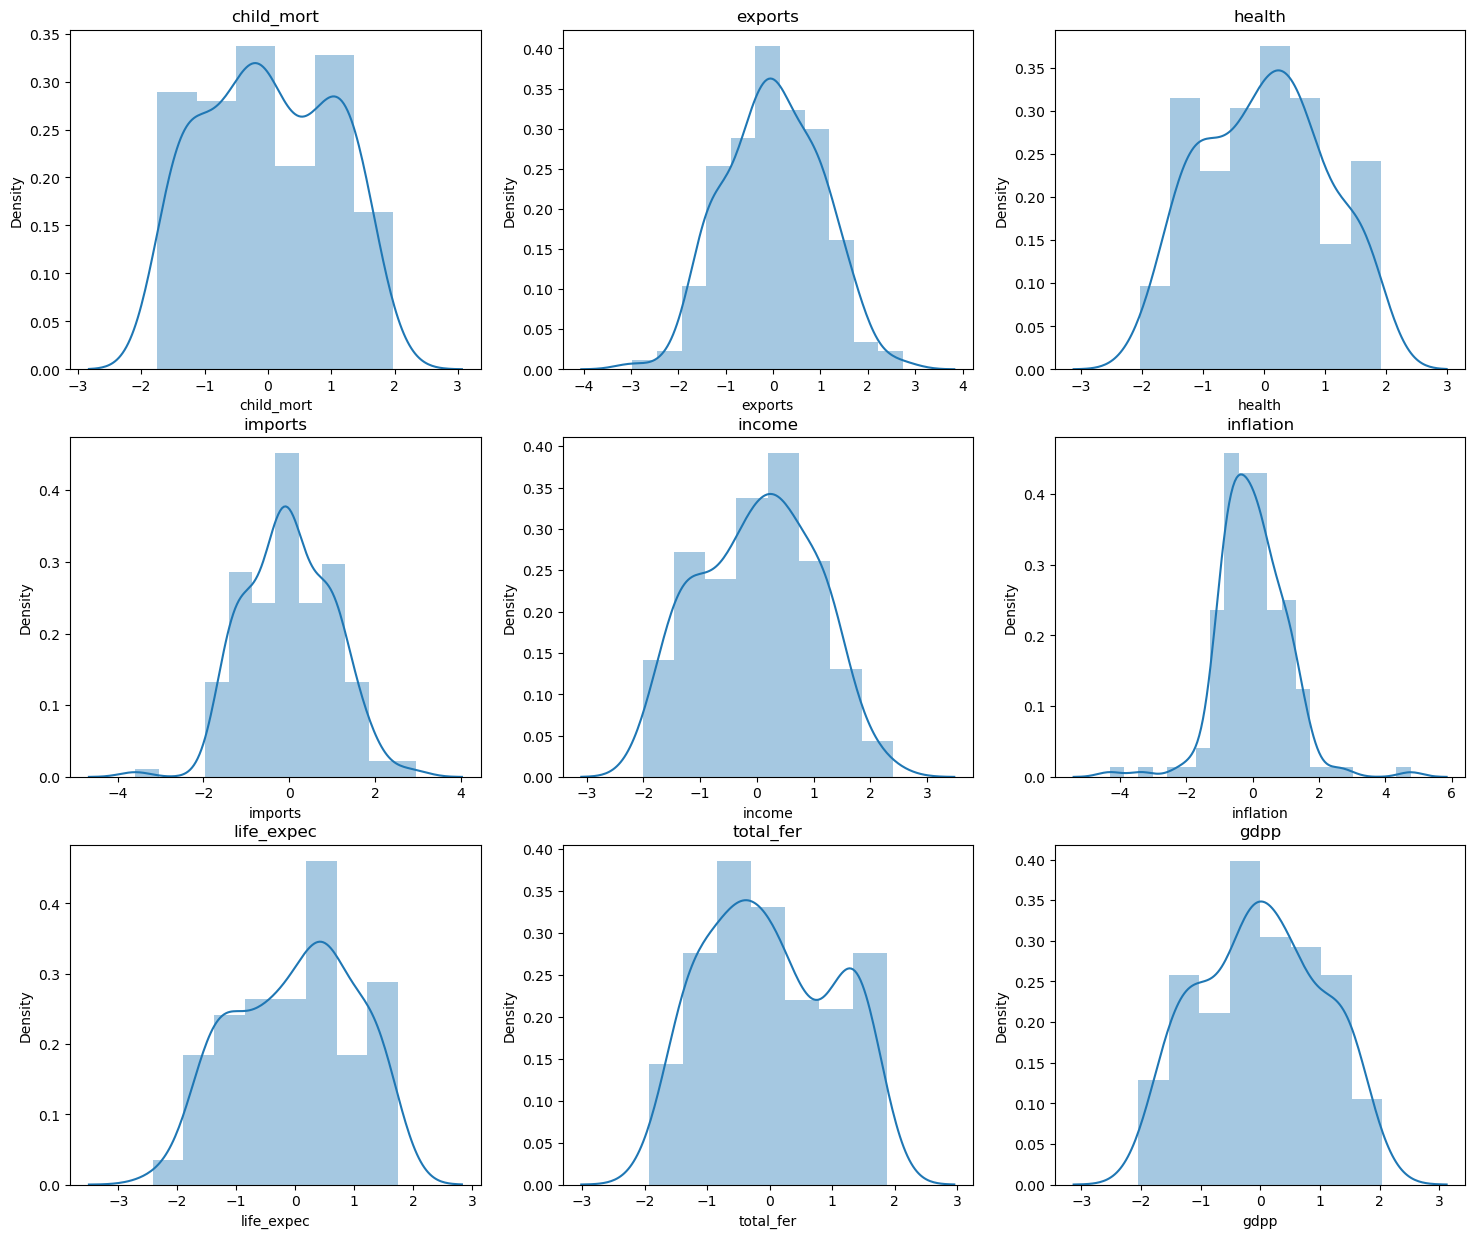

In [10]:
#Plotting all the features to visualise and look their distributions
plt.figure(figsize=(18,15))
features = transformed_data.columns
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(transformed_data[i[1]])
    plt.title(str(i[1]))

In [11]:
#skewness of each feature after transforming the data
transformed_data.skew()

child_mort    0.015754
exports      -0.011631
health        0.028684
imports       0.008375
income       -0.035867
inflation     0.182506
life_expec   -0.184956
total_fer     0.136536
gdpp          0.001120
dtype: float64

# K-Means Implementation

In [12]:
#Finding Optimal number of Clusters using elbow methed
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(transformed_data)
  labels = clusters.labels_                     # capture the cluster labels
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10] 

num_clusters  cluster_errors
0             1     1503.000000
1             2      650.272278
2             3      418.810059
3             4      364.954777
4             5      326.237895
5             6      295.755138
6             7      273.213867
7             8      253.687511
8             9      236.810425
9            10      222.509126

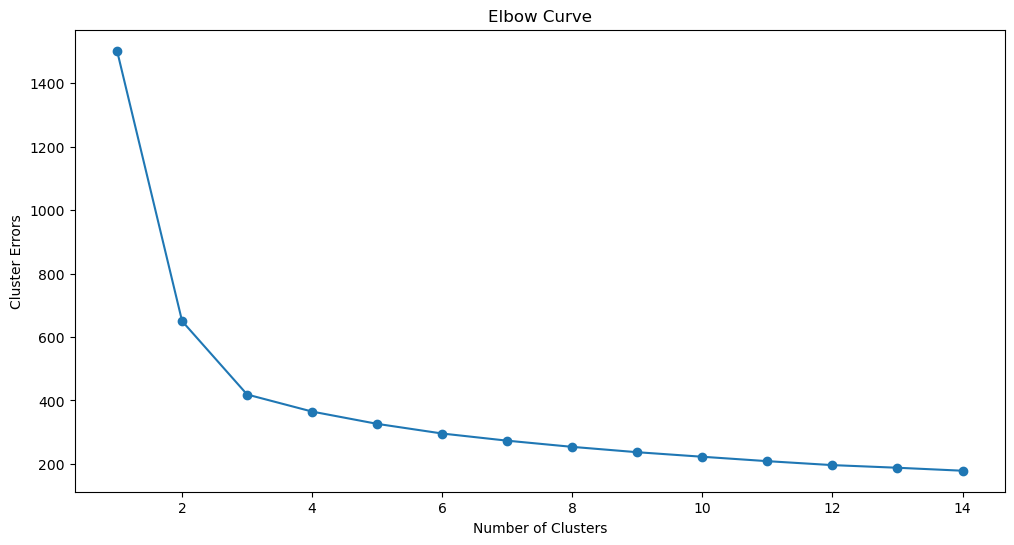

In [13]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Errors")
plt.title("Elbow Curve")
plt.show()

# From the above Elbow plot, we found that Optimal number of Clusters = 3
Implementing K-Means with number of clusters as "3"

In [14]:
# Number of clusters = 3
kmeans = KMeans(n_clusters=3,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(transformed_data)
# Getting the cluster labels
labels = kmeans.predict(transformed_data)
# Centroid values
centroids = kmeans.cluster_centers_

In [15]:
kmeans_final = pd.DataFrame(transformed_data, columns= transformed_data.columns)
kmeans_final["kmeans_grp"] = labels
df_data["kmeans_grp"] = labels
kmeans_final.head(10)

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   0.459416   -1.526455   
1   -0.220994 -0.238427 -0.042924 -0.055108  0.012538  -0.154659    0.621738   
2    0.217834 -0.030785 -0.270052 -0.266188  0.232275   1.059790    0.652698   
3    1.506186  0.100544 -0.661987 -0.219429 -0.408251   1.512843   -1.239045   
4   -0.637380  0.602677  0.563269  0.758134  0.572583  -0.723442    0.699553   
5   -0.339697  0.036270  0.636466 -0.168627  0.553895   1.412022    0.545301   
6   -0.144877 -0.508145 -0.442152 -0.241864 -0.307448   0.275860    0.183248   
7   -1.277117  0.950906  1.572599  1.032075  1.282892  -0.793127    1.594457   
8   -1.364807  1.451427  1.640826  1.531545  1.323552  -0.870154    1.319778   
9    0.537221  0.296020  0.109133 -0.353539  0.417398   0.870730   -0.353603   

   total_fer      gdpp  kmeans_grp  
0   1.544053 -1.462273           0  
1  -0.992833 -0.121133           1  
2   0.313175 -0.063195           1  
3   1.623128 -0.219666           0  
4  -0.368063  0.609228           2  
5  -0.120706  0.496207           1  
6  -0.932506 -0.281188           1  
7  -0.604207  1.574088           2  
8  -1.341021  1.506685           2  
9  -0.616839  0.117089           1

# Hierarchical Clustering

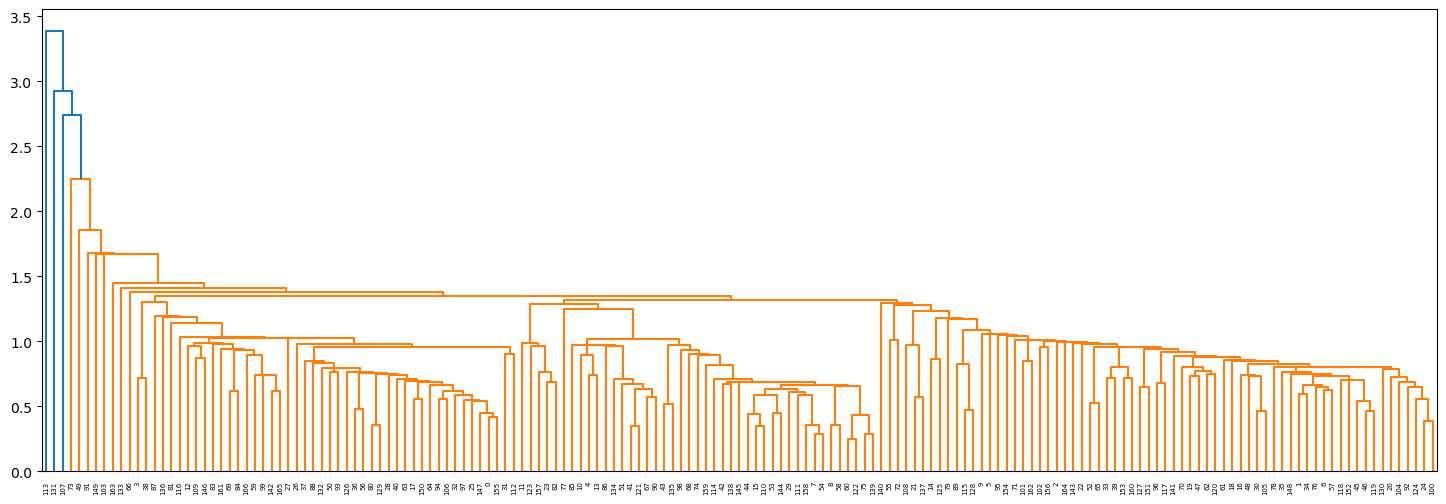

In [16]:
# single linkage
plt.figure(figsize=(18,6))
single_link = linkage(transformed_data, method="single", metric='euclidean')
dendrogram(single_link)
plt.show()

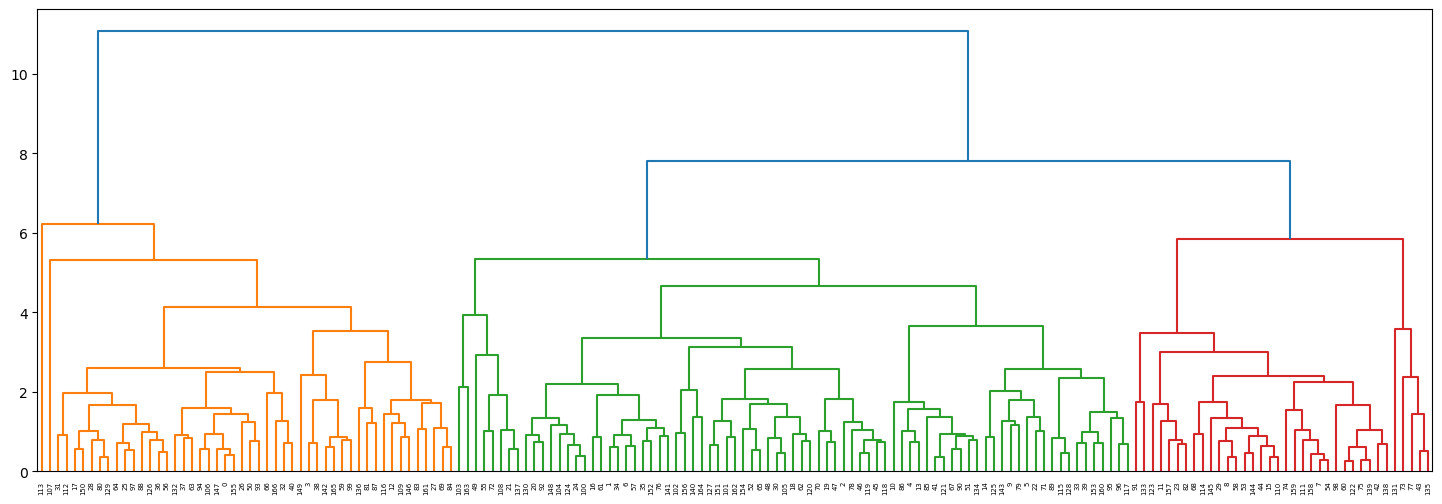

In [17]:
# complete linkage
plt.figure(figsize=(18,6))
complete_link = linkage(transformed_data, method="complete", metric='euclidean')
dendrogram(complete_link)
plt.show()

In [18]:
# 3 clusters
heirarchical_labels = cut_tree(complete_link, n_clusters=3).reshape(-1, )
heirarchical_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0])

In [19]:
heirarchical_final = pd.DataFrame(transformed_data, columns= transformed_data.columns)
heirarchical_final["h_grp"] = heirarchical_labels
df_data["h_grp"] = heirarchical_labels

In [20]:
px.scatter(transformed_data, x="child_mort", y="gdpp", color="kmeans_grp")


In [21]:
px.scatter(transformed_data, x="gdpp", y="income", color="kmeans_grp")


In [22]:
px.scatter(transformed_data, x="child_mort", y="income", color="kmeans_grp")


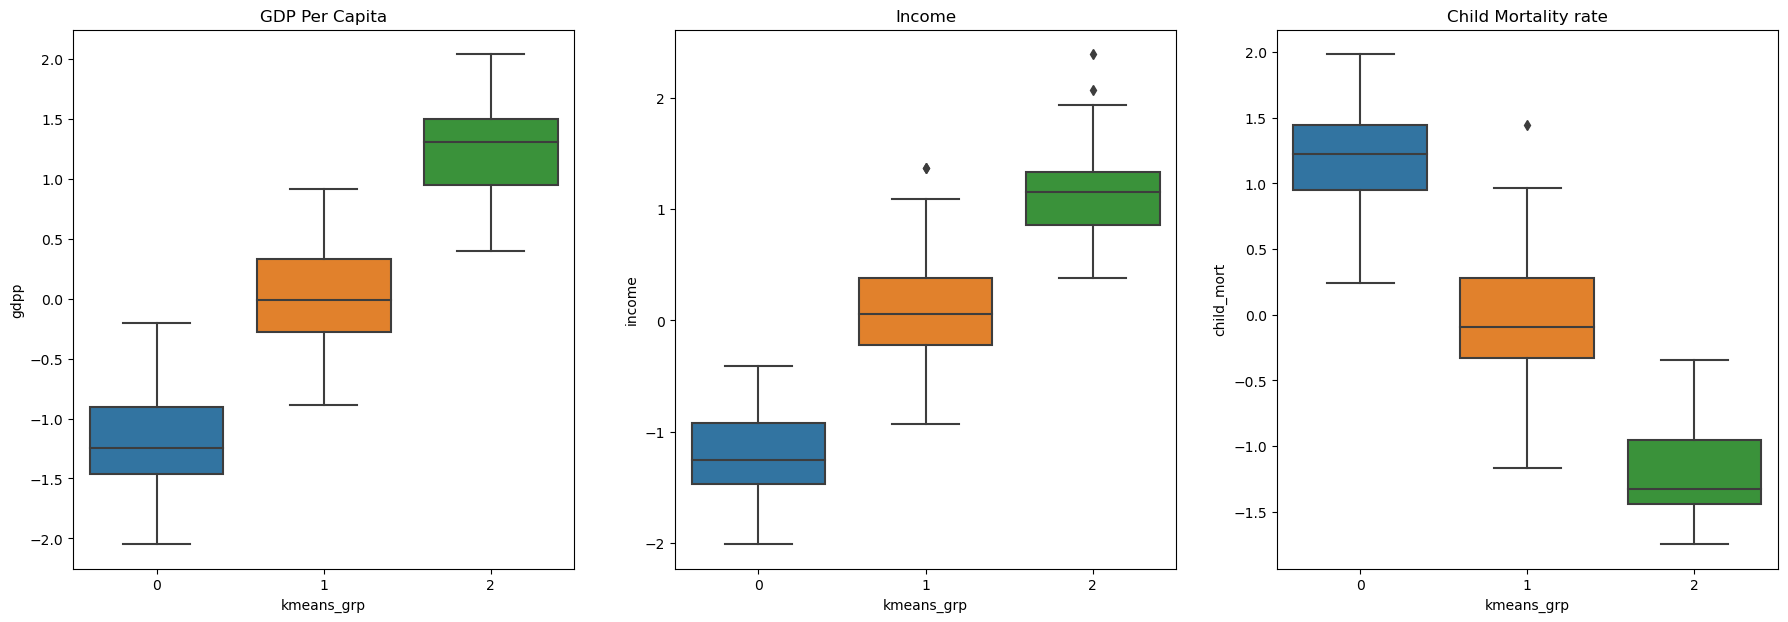

In [23]:
#Plotting box plots of all clusters formed
plt.figure(figsize=(22,7))
plt.subplot(1,3,1)
sns.boxplot(x='kmeans_grp', y='gdpp', data=transformed_data)
plt.title("GDP Per Capita")
plt.subplot(1,3,2)
sns.boxplot(x='kmeans_grp', y='income', data=transformed_data)
plt.title("Income")
plt.subplot(1,3,3)
sns.boxplot(x='kmeans_grp', y='child_mort', data=transformed_data)
plt.title("Child Mortality rate")
plt.show()

# Clusters Formed
From the above box plots and scatter plots , we could see that :
Group - 0 : *High Child Mortality, Low Income and Low GDP 
Group - 1 : *Average Child Mortality, Average Income and Average GDP
Group - 2 : *Low Child Mortality, High Income and High GDP

In [24]:
df_data[df_data.kmeans_grp==0].sort_values(by=["income","gdpp","child_mort"]).head(10)


country  child_mort  exports  health  imports  income  \
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
88                    Liberia        89.3    19.10   11.80     92.6     700   
26                    Burundi        93.6     8.92   11.60     39.2     764   
112                     Niger       123.0    22.20    5.16     49.1     814   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
106                Mozambique       101.0    31.50    5.21     46.2     918   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
150                      Togo        90.3    40.20    7.65     57.3    1210   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   

     inflation  life_expec  total_fer  gdpp  kmeans_grp  h_grp  
37       20.80        57.5       6.54   334           0      0  
88        5.47        60.8       5.02   327           0      0  
26       12.30        57.7       6.26   231           0      0  
112       2.55        58.8       7.49   348           0      0  
31        2.01        47.5       5.21   446           0      0  
106       7.64        54.5       5.56   419           0      0  
94       12.10        53.1       5.31   459           0      0  
63       16.10        58.0       5.34   648           0      0  
150       1.18        58.7       4.87   488           0      0  
132      17.20        55.0       5.20   399           0      0

In [25]:
df_data[df_data.h_grp==0].sort_values(by=["income","gdpp","child_mort"]).head(10)


country  child_mort  exports  health  imports  income  \
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
88                    Liberia        89.3    19.10   11.80     92.6     700   
26                    Burundi        93.6     8.92   11.60     39.2     764   
112                     Niger       123.0    22.20    5.16     49.1     814   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
106                Mozambique       101.0    31.50    5.21     46.2     918   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
150                      Togo        90.3    40.20    7.65     57.3    1210   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   

     inflation  life_expec  total_fer  gdpp  kmeans_grp  h_grp  
37       20.80        57.5       6.54   334           0      0  
88        5.47        60.8       5.02   327           0      0  
26       12.30        57.7       6.26   231           0      0  
112       2.55        58.8       7.49   348           0      0  
31        2.01        47.5       5.21   446           0      0  
106       7.64        54.5       5.56   419           0      0  
94       12.10        53.1       5.31   459           0      0  
63       16.10        58.0       5.34   648           0      0  
150       1.18        58.7       4.87   488           0      0  
132      17.20        55.0       5.20   399           0      0

In [26]:
df_data[df_data.kmeans_grp != df_data.h_grp]


country  child_mort  exports  health  imports  income  \
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
10               Bahamas        13.8     35.0    7.89     43.7   22900   
13              Barbados        14.2     39.5    7.97     48.7   15300   
41               Croatia         5.5     37.6    7.76     38.1   20100   
51               Estonia         4.5     75.1    6.03     68.7   22700   
67               Hungary         6.0     81.8    7.33     76.5   22300   
85                Latvia         7.8     53.7    6.68     55.1   18300   
86               Lebanon        10.3     35.8    7.03     60.2   16300   
90             Lithuania         6.1     65.3    7.04     67.2   21100   
121               Poland         6.0     40.1    7.46     42.1   21800   
134      Slovak Republic         7.0     76.3    8.79     77.8   25200   

     inflation  life_expec  total_fer   gdpp  kmeans_grp  h_grp  
4        1.440        76.8       2.13  12200           2      1  
10      -0.393        73.8       1.86  28000           2      1  
13       0.321        76.7       1.78  16000           2      1  
41       0.821        76.3       1.55  13500           2      1  
51       1.740        76.0       1.72  14600           2      1  
67       2.330        74.5       1.25  13100           2      1  
85      -0.812        73.1       1.36  11300           2      1  
86       0.238        79.8       1.61   8860           2      1  
90       2.380        73.2       1.50  12000           2      1  
121      1.660        76.3       1.41  12600           2      1  
134      0.485        75.5       1.43  16600           2      1


# From above comparision, we could see there are some countries that are classified under group 2 in KMeans but classified as Group 1 in Heirarchical clustering
